In [8]:
import os
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ticker_symbol = "SPY"

start_date = "2024-10-22"
end_date = "2025-10-22"

print(f"Downloading data for {ticker_symbol} from {start_date} to {end_date}...")
data = yf.download(ticker_symbol, start=start_date, end=end_date)

if data.empty:
    print(f"No data found for {ticker_symbol}. Please check the ticker symbol and date range.")
else:
    # Display the first 5 rows of the downloaded data
    print("\nDownload complete! Here are the first 5 rows:")
    print(data.head())

    # Display the last 5 rows of the downloaded data
    print("\nAnd here are the last 5 rows:")
    print(data.tail())

C:\Users\chuaw\AppData\Local\Temp\ipykernel_5716\2158780101.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Download complete! Here are the first 5 rows:
Price            Close        High         Low        Open    Volume
Ticker             SPY         SPY         SPY         SPY       SPY
Date                                                                
2024-10-22  576.313477  577.479296  573.408788  574.070723  34183800
2024-10-23  571.047485  574.722834  567.520359  574.278227  49314600
2024-10-24  572.282532  573.092690  569.644619  573.013634  34979900
2024-10-25  572.084839  577.439780  571.136409  574.525202  47268200
2024-10-28  573.853394  575.710817  573.547120  575.582373  30174700

And here are the last 5 rows:
Price            Close        High         Low        Open     Volume
Ticker             SPY         SPY         SPY         SPY        SPY
Date                                                                 
2025-10-15  665.169983  670.229980  658.929993  666.820007   81702600
2025-10-16  660.640015  668.710022  657.109985  666.820007  110563300
2025-10-17  664.3900

In [6]:
data.columns

MultiIndex([( 'Close', 'SPY'),
            (  'High', 'SPY'),
            (   'Low', 'SPY'),
            (  'Open', 'SPY'),
            ('Volume', 'SPY')],
           names=['Price', 'Ticker'])

In [7]:
# Check if the download was successful
if not data.empty:
    # Print the column names to confirm the MultiIndex structure
    print("Columns in the DataFrame:", data.columns)

    # --- CORRECTED CODE ---
    # Access the columns using a tuple for the MultiIndex
    close_price_series = data[('Close', 'SPY')]

    # Calculate simple daily returns
    data[('Simple_Return', 'SPY')] = close_price_series.pct_change()

    # Calculate log returns
    data[('Log_Return', 'SPY')] = np.log(close_price_series / close_price_series.shift(1))

    # Display the DataFrame with the new columns
    print("\nData with calculated daily returns:")
    print(data.head())

Columns in the DataFrame: MultiIndex([( 'Close', 'SPY'),
            (  'High', 'SPY'),
            (   'Low', 'SPY'),
            (  'Open', 'SPY'),
            ('Volume', 'SPY')],
           names=['Price', 'Ticker'])

Data with calculated daily returns:
Price            Close        High         Low        Open    Volume  \
Ticker             SPY         SPY         SPY         SPY       SPY   
Date                                                                   
2024-10-22  576.313477  577.479296  573.408788  574.070723  34183800   
2024-10-23  571.047485  574.722834  567.520359  574.278227  49314600   
2024-10-24  572.282532  573.092690  569.644619  573.013634  34979900   
2024-10-25  572.084839  577.439780  571.136409  574.525202  47268200   
2024-10-28  573.853394  575.710817  573.547120  575.582373  30174700   

Price      Simple_Return Log_Return  
Ticker               SPY        SPY  
Date                                 
2024-10-22           NaN        NaN  
2024-10-23    

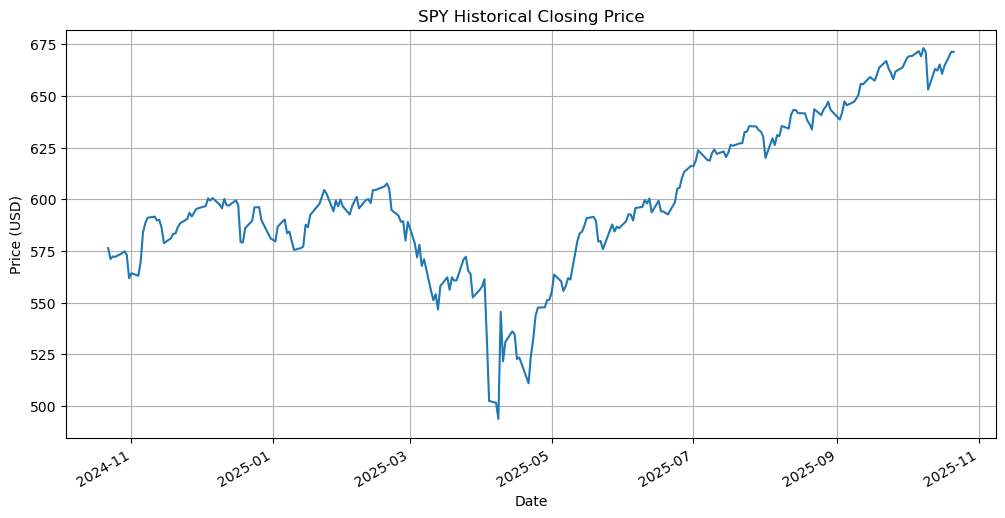

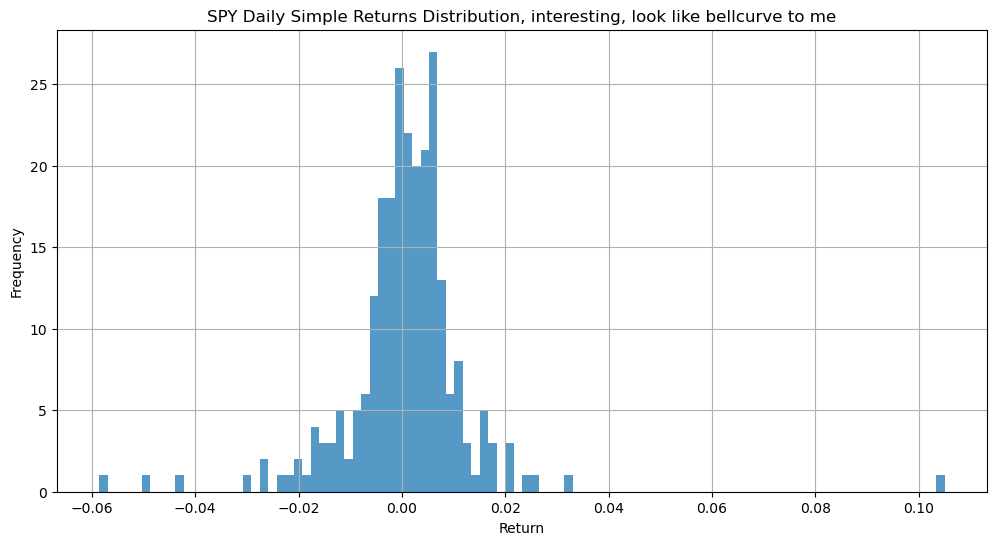

In [11]:
if not data.empty:
    # --- PLOTTING CODE ---

    # 1. Plot the historical closing price
    data[('Close', 'SPY')].plot(title='SPY Historical Closing Price', figsize=(12, 6))
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.show()

    # 2. Plot a histogram of the simple daily returns
    data[('Simple_Return', 'SPY')].hist(bins=100, figsize=(12, 6), alpha=0.75)
    #interesting
    plt.title('SPY Daily Simple Returns Distribution, interesting, look like bellcurve to me')
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Next Concept: Modern Portfolio Theory (MPT) 📊
The first major topic in this module is Modern Portfolio Theory (MPT).

At its heart, MPT is a mathematical framework for a timeless piece of wisdom: "don't put all your eggs in one basket". It provides a way to quantify two essential properties of any investment:

Expected Return: What you anticipate an asset will earn.

Risk: How volatile or uncertain that return is. MPT measures this using the standard deviation of returns.

The core idea of MPT is that by combining assets that don't move perfectly in sync, you can reduce the overall risk of your portfolio without sacrificing returns

# Understanding Risk and Return: Modern Portfolio Theory (MPT)

<h2>Developed by Harry Markowitz in 1952, Modern Portfolio Theory (MPT) was a revolutionary, mathematical formalization of the age-old wisdom, "don't put all your eggs in one basket".42</h2>
The Markowitz Revolution: MPT provides a quantitative framework for managing portfolio risk. It begins by defining two key properties for any asset: its expected return (the anticipated profit) and its risk, which Markowitz quantified as the variance (or standard deviation) of its returns.16 The crucial insight of MPT is that the risk of a portfolio is not simply the weighted average of the risks of its individual assets. Instead, it also depends on how the assets move in relation to one another, a property measured by covariance or correlation.42 The power of diversification comes not just from holding many assets, but from holding assets that have low, or ideally negative, correlation with each other. When one asset performs poorly, another may perform well, smoothing the overall portfolio return and reducing its total variance.17
The Efficient Frontier: Using these principles, one can construct a set of "optimal" portfolios. The efficient frontier is a curve on a risk-return graph that represents all portfolios offering the highest possible expected return for a given level of risk (variance).42 Any portfolio that lies below the curve is sub-optimal, as another portfolio exists that offers either higher return for the same risk, or lower risk for the same return. The mathematical process of finding this frontier involves a constrained optimization problem, typically solved using Lagrange multipliers, which aims to minimize the portfolio variance ($V = w'Cw$) subject to achieving a target return ($w'm = \mu$) and being fully invested ($w'u = 1$).16

<h2>Asset Pricing and Market Efficiency</h2>

Building on MPT, asset pricing models attempt to explain why different assets have different expected returns.
Capital Asset Pricing Model (CAPM): CAPM introduces a critical distinction between two types of risk. Unsystematic risk is specific to a company or asset (e.g., a factory fire, a failed drug trial) and can be eliminated through diversification. Systematic risk, on the other hand, is market-wide risk (e.g., interest rate changes, recessions) and cannot be diversified away.17 CAPM posits that the expected return of an asset is determined only by its systematic risk, which is measured by a variable called beta ($\beta$). Beta measures an asset's volatility relative to the overall market. A beta of 1 means the asset moves in line with the market; a beta greater than 1 means it is more volatile.44
The Efficient Market Hypothesis (EMH): This is one of the most important and debated theories in finance. EMH suggests that asset prices fully reflect all available information.44 In its "weak form," it states that all past price and volume data is already incorporated into the current price, making technical analysis useless. In its "semi-strong form," it claims that all publicly available information (news, earnings reports) is also reflected. The implication is profound: if the market is efficient, it is extremely difficult to consistently "beat the market" or generate excess returns, as there are no under- or over-valued assets to exploit.44 While the degree of market efficiency is debatable, EMH provides a crucial baseline assumption and underscores the challenge that quantitative traders face.


In [12]:
if not data.empty:
    # --- DESCRIPTIVE STATISTICS ---

    # Calculate the average daily return (our estimate of expected return)
    # We use the log returns for statistical analysis
    avg_log_return = data[('Log_Return', 'SPY')].mean()

    # Calculate the daily risk (standard deviation of returns)
    daily_risk = data[('Log_Return', 'SPY')].std()

    # Annualize the metrics for a more intuitive understanding
    # There are approx. 252 trading days in a year
    annualized_return = avg_log_return * 252
    annualized_risk = daily_risk * (252**0.5) # Multiply by square root of 252

    print("\n--- SPY Performance Analysis ---")
    print(f"Average Daily Log Return: {avg_log_return:.6f}")
    print(f"Daily Risk (Std. Dev.):   {daily_risk:.6f}")
    print("--------------------------------")
    print(f"Annualized Log Return: {annualized_return:.2%}")
    print(f"Annualized Risk (Volatility): {annualized_risk:.2%}")


--- SPY Performance Analysis ---
Average Daily Log Return: 0.000613
Daily Risk (Std. Dev.):   0.012313
--------------------------------
Annualized Log Return: 15.44%
Annualized Risk (Volatility): 19.55%


#The Next Logical Step: The Sharpe Ratio
Now that you have both the risk and the return, you can combine them into a single, powerful metric: the Sharpe Ratio.

The Sharpe Ratio is one of the most common ways to measure risk-adjusted return. It answers the crucial question: "Am I getting enough reward for the amount of risk I'm taking?". A higher Sharpe Ratio is always better, as it indicates a better return for the same amount of risk.


Calculating this ratio is the next logical progression in your analysis and a core concept you'll use throughout your quantitative finance journey.

How to Calculate the Sharpe RatioThe formula is:$$Sharpe\ Ratio = \frac{(Annualized\ Return - Risk-Free\ Rate)}{Annualized\ Risk}$$Risk-Free Rate: This is the return you could get on a theoretically "zero-risk" investment, like a U.S. Treasury bill. For this calculation, we'll assume a risk-free rate of 3% (or 0.03).Here's the Python code to add to your script. It uses the annualized_return and annualized_risk variables you just calculated.

In [13]:
# Assume an annual risk-free rate of 3%
risk_free_rate = 0.03

# Calculate the Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_risk

print("--------------------------------")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

--------------------------------
Sharpe Ratio: 0.64
